<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Scenario-1" data-toc-modified-id="Scenario-1-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Scenario 1</a></span><ul class="toc-item"><li><span><a href="#Solving-with-Outer-Loop" data-toc-modified-id="Solving-with-Outer-Loop-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Solving with Outer Loop</a></span></li></ul></li><li><span><a href="#Scenario-2" data-toc-modified-id="Scenario-2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Scenario 2</a></span><ul class="toc-item"><li><span><a href="#Solving-with-Outer-Loop" data-toc-modified-id="Solving-with-Outer-Loop-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Solving with Outer Loop</a></span></li></ul></li><li><span><a href="#Scenario-3" data-toc-modified-id="Scenario-3-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Scenario 3</a></span><ul class="toc-item"><li><span><a href="#Solving-with-Outer-Loop" data-toc-modified-id="Solving-with-Outer-Loop-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Solving with Outer Loop</a></span></li></ul></li><li><span><a href="#Nice-things-to-add" data-toc-modified-id="Nice-things-to-add-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Nice things to add</a></span></li></ul></div>

# Description

This notebook will implement the Outer Loop algorithm only. 
We want to test its scalability and also build a few viz routines in order to explore the results and their evolution

# Load

In [24]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

from graph import expand_graph

import pandas as pd
import os

from graph import construct_graph, get_edge_list
from FW_OuterUpdate import solve

from result_analysis import check_flow_cons_at_OD_nodes, check_flow_cons

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Scenario 1

In [3]:
path='Data/2Nodes/'

In [4]:
G_0, OD = construct_graph(path)

In [5]:
edge_list=get_edge_list(G_0)

## Solving with Outer Loop

In [23]:
#tol: difference in ri between two iterations
#FW_tol: value of the certificate

G_FW,ri_FW, n_outer, n_inner = solve(G_0.copy(),OD.copy(),edge_list,tol=10**-4, FW_tol=10**-4, max_iter=5000)

##########################################
ITERATION #:  1
CURRENT RI_k
{'1': 0, '1_p': 0, '2': 0, '2_p': 0, 'R': 0}
CURRENT OD: {('1', '1_p'): 10, ('2', '2_p'): 10, ('1', 'R'): 0, ('2', 'R'): 0}
     FW solved to tol
     Number of inner loop iterations:  4710
##########################################
ITERATION #:  2
CURRENT RI_k
{'1': 5.637541764587381, '1_p': 0, '2': -5.637541764587381, '2_p': 0, 'R': 0}
CURRENT OD: {('1', '1_p'): 10, ('2', '2_p'): 10, ('1', 'R'): 0, ('2', 'R'): 5.637541764587381}
     FW solved to tol
     Number of inner loop iterations:  4710


In [29]:
net_flow, l = check_flow_cons(G_FW[-1], OD)

In [32]:
balance=check_flow_cons_at_OD_nodes(G_FW[-1], OD)
print(np.linalg.norm(balance))

1.632896157031126e-14


# Scenario 2

In [37]:
path='Data/3Nodes/'

In [38]:
G_0, OD = construct_graph(path)

In [39]:
edge_list=get_edge_list(G_0)

## Solving with Outer Loop

In [23]:
#tol: difference in ri between two iterations
#FW_tol: value of the certificate

G_FW,ri_FW, n_outer, n_inner = solve(G_0.copy(),OD.copy(),edge_list,tol=10**-4, FW_tol=10**-4, max_iter=5000)

##########################################
ITERATION #:  1
CURRENT RI_k
{'1': 0, '1_p': 0, '2': 0, '2_p': 0, 'R': 0}
CURRENT OD: {('1', '1_p'): 10, ('2', '2_p'): 10, ('1', 'R'): 0, ('2', 'R'): 0}
     FW solved to tol
     Number of inner loop iterations:  4710
##########################################
ITERATION #:  2
CURRENT RI_k
{'1': 5.637541764587381, '1_p': 0, '2': -5.637541764587381, '2_p': 0, 'R': 0}
CURRENT OD: {('1', '1_p'): 10, ('2', '2_p'): 10, ('1', 'R'): 0, ('2', 'R'): 5.637541764587381}
     FW solved to tol
     Number of inner loop iterations:  4710


In [29]:
net_flow, l = check_flow_cons(G_FW[-1], OD)

In [32]:
balance=check_flow_cons_at_OD_nodes(G_FW[-1], OD)
print(np.linalg.norm(balance))

1.632896157031126e-14


# Scenario 3

In [48]:
path='Data/3Nodes_ex2/'

G_0, OD = construct_graph(path)

In [141]:
('1','2') in G_0.edges

True

## Solving with Outer Loop

In [60]:
#tol: difference in ri between two iterations
#FW_tol: value of the certificate

G_FW,ri_FW, n_outer, n_inner, balance = solve(G_0.copy(),OD.copy(),edge_list,tol=10**-4, FW_tol=10**-4, max_iter=3000)

##########################################
ITERATION #:  1
CURRENT RI_k
{'1': 0, '1_p': 0, '2': 0, '2_p': 0, '3': 0, '3_p': 0, 'R': 0}
CURRENT OD: {('1', '1_p'): 20, ('2', '2_p'): 20, ('3', '3_p'): 20, ('1', 'R'): 0, ('2', 'R'): 0, ('3', 'R'): 0}
     Max inner iterations reached
     Number of inner loop iterations:  3000
##########################################
ITERATION #:  2
CURRENT RI_k
{'1': -6.996206683048811, '1_p': 0, '2': -0.26928620950466176, '2_p': 0, '3': 7.265492892553473, '3_p': 0, 'R': 0}
CURRENT OD: {('1', '1_p'): 20, ('2', '2_p'): 20, ('3', '3_p'): 20, ('1', 'R'): 6.996206683048811, ('2', 'R'): 0.26928620950466176, ('3', 'R'): 0}
     Max inner iterations reached
     Number of inner loop iterations:  3000
##########################################
ITERATION #:  3
CURRENT RI_k
{'1': -6.99161127947359, '1_p': 0, '2': -0.27159945130436647, '2_p': 0, '3': 7.263210730777956, '3_p': 0, 'R': 0}
CURRENT OD: {('1', '1_p'): 20, ('2', '2_p'): 20, ('3', '3_p'): 20, ('1', 'R'):

In [61]:
balance

array([1.00899361e+01, 5.62823987e-03, 4.11748982e-05])

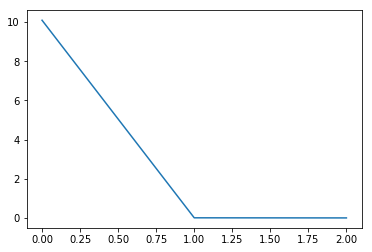

In [62]:
plt.figure()
plt.plot(balance)

# Nice things to add

- Evolution of an attribute over iterations
- Graph representation of the different flows
- Implement a function that actually shows whether or not you are satisfying the C = D-1 condition for all paths? 
- Vizualize how r_i evolves over the iterations